In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
# from statsmodels.tsa.arima 
# from statsmodels.tsa.arima_model
# from statsmodels.tsa.ar_model
# from statsmodels.tsa.arma_mle

In [10]:
df = pd.read_excel("../Data/VN_GDP_2021.xlsx")
df['date'] = pd.to_datetime([f'{x[:4]}{x[-2:]}' for x in df['Date']])
gdp1.index = df["date"]
df.dropna(inplace=True)

## GDP1

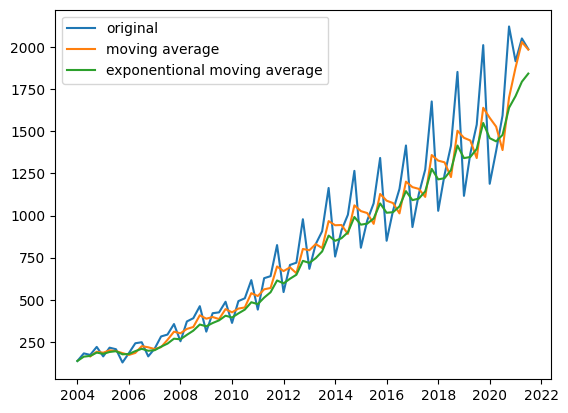

In [15]:
plt.plot(df["gdp1"], label="original")
plt.plot(df["gdp1"].rolling(3).mean(), label="moving average")
plt.plot(df["gdp1"].ewm(3).mean(), label="exponentional moving average")
plt.legend()


### Mùa vụ dạng Cộng

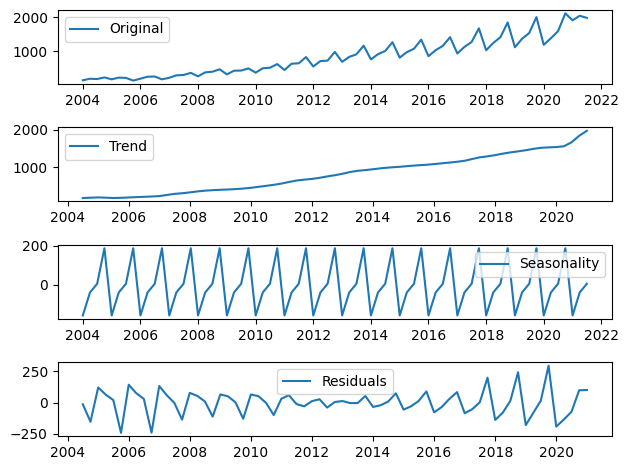

In [8]:
gdp1 = df["gdp1"]
decomposition = seasonal_decompose(gdp1, period=4, model="additive")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(gdp1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Mùa vụ dạng Nhân

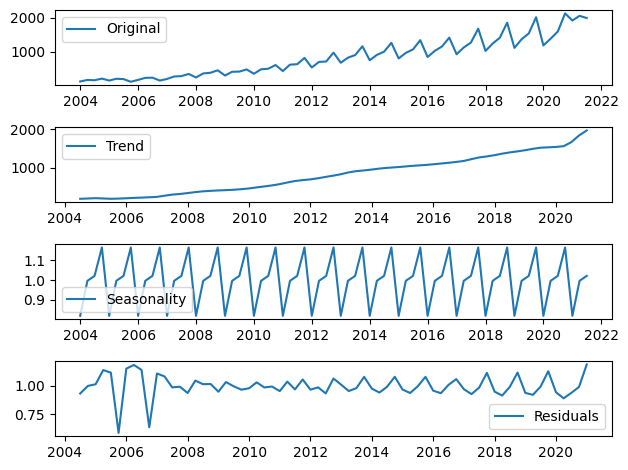

In [6]:
gdp1 = df["gdp1"]
decomposition = seasonal_decompose(gdp1, period=4, model="multiplicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(gdp1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Mô hình Holt-Winters

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


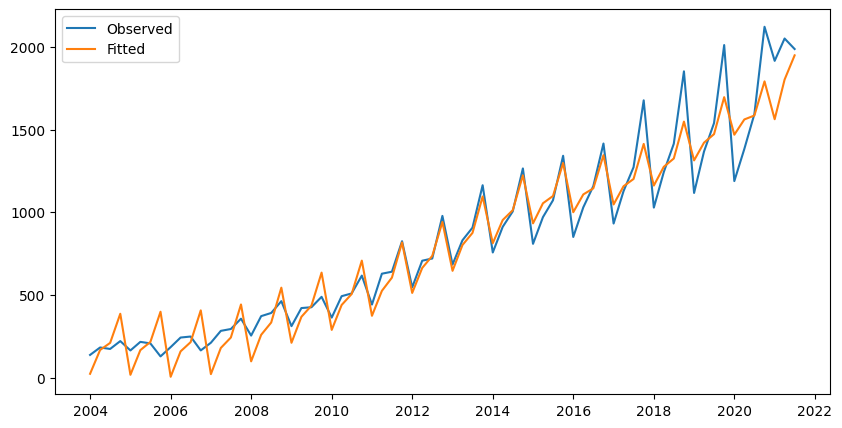

In [43]:
model = ExponentialSmoothing(gdp1, trend='add', seasonal='add', seasonal_periods=4)
fitted_model = model.fit(smoothing_level=0.2, smoothing_trend=0.2, smoothing_seasonal=0)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(gdp1.index, gdp1, label='Observed')
ax.plot(gdp1.index, fitted_model.fittedvalues, label='Fitted')
ax.legend()
plt.show()

In [44]:
fitted_model.summary()

Dep. Variable:,gdp1,No. Observations:,71
Model:,ExponentialSmoothing,SSE,1248066.087
Optimized:,True,AIC,709.984
Trend:,Additive,BIC,728.086
Seasonal:,Additive,AICC,713.651
Seasonal Periods:,4,Date:,"Tue, 21 Feb 2023"
Box-Cox:,False,Time:,13:47:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.2000000,beta,False
